# **Question**

**Logistic regression. Using the data provided (Logistic_regression_ls.csv), plot the decision boundary (linear) using Optimization of the sigmoid function.**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return cost

# Gradient descent
def gradient_descent(theta, X, y, alpha, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = (1/m) * np.dot(X.T, (h - y))
        theta -= alpha * gradient
        costs.append(cost_function(theta, X, y))
    return theta, costs


In [6]:
# Load the dataset
data = pd.read_csv("Logistic_regression_ls.csv")

# Separate features and target variable
X = data[['x1', 'x2']].values
y = data['label'].values

# Add intercept term to X
X = np.hstack((np.ones((X.shape[0], 1)), X))



# Initialize theta
initial_theta = np.zeros(X.shape[1])

# Hyperparameters
alpha = 0.01
iterations = 10000

# Train the model
optimal_theta, costs = gradient_descent(initial_theta, X, y, alpha, iterations)

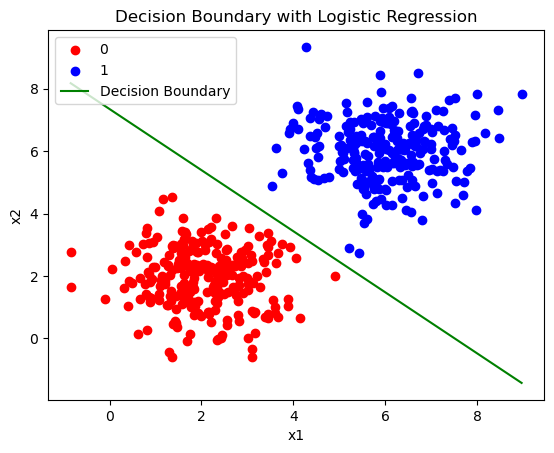

In [7]:
# Plot the decision boundary
plt.scatter(data[data['label']==0]['x1'], data[data['label']==0]['x2'], color='red', label='0')
plt.scatter(data[data['label']==1]['x1'], data[data['label']==1]['x2'], color='blue', label='1')

x_boundary = np.array([np.min(X[:,1]), np.max(X[:,1])])
y_boundary = (-1/optimal_theta[2]) * (optimal_theta[1]*x_boundary + optimal_theta[0])

plt.plot(x_boundary, y_boundary, color='green', label='Decision Boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Decision Boundary with Logistic Regression')
plt.show()


# **Interpretation**

* Logistic regression effectively separates classes with a linear decision boundary.

* Model convergence is evident from the well-defined boundary.

* Visual inspection confirms the successful classification of data points.

* Logistic regression proves suitable for this binary classification task.